In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
items = "items.csv"
sales = "sales.csv"
# show = "Show.csv"

items_data = pd.read_csv(items, low_memory=False)
sales_data = pd.read_csv(sales, low_memory=False)
# show_data = pd.read_csv(show, low_memory=False)

combined_sales_items = pd.merge(items_data, sales_data, how="left", on="Item")
combined_sales_items.head()

,Item,Description,Dim,Dimension,GDim,Tipo,Unit,Period,Qtty,Sales,Store,TipoC,Customer,Location
0,Item_1,SCRAP BAGS,1605,[M] Comp Empaques,Abarrotes,Venta,PZ,202002.0,-124.0,1488.0,StoreA,V Mostrador,Customer27435,D. F.
1,Item_1,SCRAP BAGS,1605,[M] Comp Empaques,Abarrotes,Venta,PZ,202007.0,-19.0,228.0,StoreA,V Mostrador,Customer27435,D. F.
2,Item_1,SCRAP BAGS,1605,[M] Comp Empaques,Abarrotes,Venta,PZ,202010.0,-43.0,516.0,StoreA,V Mostrador,Customer27435,D. F.
3,Item_1,SCRAP BAGS,1605,[M] Comp Empaques,Abarrotes,Venta,PZ,202104.0,-88.0,1056.0,StoreA,V Mostrador,Customer27435,D. F.
4,Item_1,SCRAP BAGS,1605,[M] Comp Empaques,Abarrotes,Venta,PZ,202107.0,-155.0,1860.0,StoreA,V Mostrador,Customer27435,D. F.


In [4]:
combined_sales_items['Period'] = combined_sales_items['Period'].astype(str)

# Crear las nuevas columnas 'Year' y 'Month'
combined_sales_items['Year'] = combined_sales_items['Period'].str[:4]
combined_sales_items['Month'] = combined_sales_items['Period'].str[4:]
combined_sales_items.head()

,Item,Description,Dim,Dimension,GDim,Tipo,Unit,Period,Qtty,Sales,Store,TipoC,Customer,Location,Year,Month
0,Item_1,SCRAP BAGS,1605,[M] Comp Empaques,Abarrotes,Venta,PZ,202002.0,-124.0,1488.0,StoreA,V Mostrador,Customer27435,D. F.,2020,02.0
1,Item_1,SCRAP BAGS,1605,[M] Comp Empaques,Abarrotes,Venta,PZ,202007.0,-19.0,228.0,StoreA,V Mostrador,Customer27435,D. F.,2020,07.0
2,Item_1,SCRAP BAGS,1605,[M] Comp Empaques,Abarrotes,Venta,PZ,202010.0,-43.0,516.0,StoreA,V Mostrador,Customer27435,D. F.,2020,10.0
3,Item_1,SCRAP BAGS,1605,[M] Comp Empaques,Abarrotes,Venta,PZ,202104.0,-88.0,1056.0,StoreA,V Mostrador,Customer27435,D. F.,2021,04.0
4,Item_1,SCRAP BAGS,1605,[M] Comp Empaques,Abarrotes,Venta,PZ,202107.0,-155.0,1860.0,StoreA,V Mostrador,Customer27435,D. F.,2021,07.0


In [27]:
combined_sales_items['Sales'] = combined_sales_items['Sales'].astype(str).replace('-','')

combined_sales_items['Sales'] = combined_sales_items['Sales'] .astype(float).round(2)
combined_sales_items = combined_sales_items[combined_sales_items['Sales'] >= 1]
sales_by_year = combined_sales_items.set_index('GDim')
sales_by_year = combined_sales_items.groupby(['GDim'])
sales_by_year = combined_sales_items.groupby(['Year'])
sales_by_year = combined_sales_items.groupby(['Sales']).sum()
sales_by_year.head()

,Item,Description,Dim,Dimension,GDim,Tipo,Unit,Period,Qtty,Store,TipoC,Customer,Location,Year,Month
Sales,,,,,,,,,,,,,,,
1.00,Item_4Item_4Item_4Item_1589Item_4055Item_4055I...,other productsother productsother productsSHOE...,32293,NoNoNo[M] UniformesNoNoNoNoNoNoNoNoNoNoPistach...,AbarrotesAbarrotesAbarrotesAbarrotesAbarrotesA...,NoNoNoMaterialesNoNoNoNoNoNoNoNoNoNoVentaMater...,KGKGKGPZKGKGKGKGKGKGKGKGKGKGKGKG,202101.0202106.0202203.0202008.0202007.0202007...,-1015.000,StoreAStoreAStoreAStoreAStoreDStoreCStoreCStor...,V CcteV CcteV CcteV MostradorV CcteV CcteV Cct...,Customer8271Customer8179Customer27033Customer2...,CDMXD. F.ESTADO DE MEXICOCDMXCDMXCDMX,2021202120222020202020202020202120212021202120...,01.006.003.008.007.007.009.001.004.005.010.002...
1.04,Item_4055,OTHER PRODUCTS,1906,No,Abarrotes,No,KG,202205.0,-1.000,StoreC,0,0,0,2022,05.0
1.06,Item_4055,OTHER PRODUCTS,1906,No,Abarrotes,No,KG,202001.0,-1.000,StoreC,V Ccte,Customer7060,CDMX,2020,01.0
1.08,Item_4055Item_4097,OTHER PRODUCTSSPECIAL NUGGET CLOVER B-25K,9916,NoPepita,AbarrotesSemillas,NoVenta,KGKG,202207.0202202.0,-1.215,StoreCStoreD,V Mostrador,Customer27537,d,20222022,07.002.0
1.11,Item_4055,OTHER PRODUCTS,1906,No,Abarrotes,No,KG,202209.0,-1.000,StoreC,V Ccte,Customer27198,CDMX,2022,09.0


In [17]:
pivot_table = pd.pivot_table(combined_sales_items, 
                             values='Sales',  # Cambia 'Sales' por el nombre correcto de la columna de ventas si es diferente
                             index='GDim', 
                             columns='Year', 
                             aggfunc="sum",  # Función de agregación para sumar las ventas
                             fill_value=0) 
pivot_table

Year,2020,2021,2022,2023,2024
GDim,,,,,
Abarrotes,33695197.68,33769333.19,34394161.06,35642362.08,16582324.75
Chiles Secos,53297977.06,45968490.88,55024702.33,52181460.60,22612518.11
Especias,38675176.36,38792506.90,37798643.38,39445310.22,17558787.92
Frutas Secas,50273260.41,49748280.77,53514533.13,53108275.45,24300819.79
Frutas y verduras,5016.00,2786.19,4267739.40,3098413.60,807411.35
Nueces y Almendras,51512533.53,58949645.43,62986511.23,53315978.87,21704818.51
Producción,18460717.78,24927845.50,26613171.01,29442607.36,14176397.47
Productos del Mar,25526852.47,26248697.29,26912530.08,30744922.29,10887484.19
Semillas,33483406.05,32809354.33,35675649.11,36427036.98,18770759.28


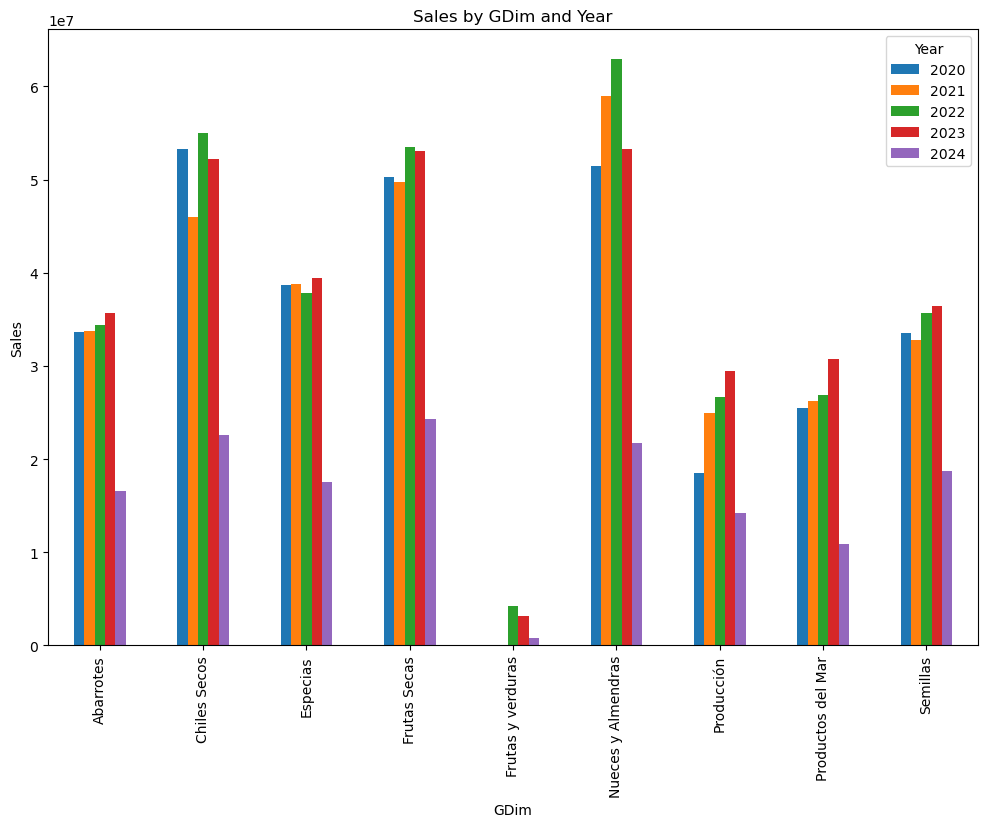

In [25]:
pivot_table.plot(kind='bar', figsize=(12, 8))
plt.title('Sales by GDim and Year')
plt.xlabel('GDim')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

In [45]:
# Filtrar los datos para GDim 'Frutas Secas'
frutas_secas_data = combined_sales_items[combined_sales_items['GDim'] == 'Frutas Secas']

# Crear una tabla pivot para analizar las ventas por dimensión y año
pivot_table_frutas_secas = pd.pivot_table(frutas_secas_data, 
                                          values='Sales', 
                                          index='Dimension', 
                                          columns='Year', 
                                          aggfunc='sum', 
                                          fill_value=0)
# Mostrar la tabla pivot
print(pivot_table_frutas_secas)

Year                 2020         2021         2022         2023        2024
Dimension                                                                   
Arandano       9825992.93  10942273.74  10369402.03  10400294.51  4911393.86
Cacahuates     2625790.15   2972198.34   3853061.40   4873848.88  1982943.76
Cerezas        1252101.50   1691465.47   2534558.90   2821689.84  1249335.83
Ciruelas       7759886.41   7697337.13   7261619.24   6667975.69  1667741.27
Coco           1015934.67    979067.06    857163.19    734667.13   462547.14
Cristalizadas   663729.95    525170.69    795044.66    996348.47   161735.97
Datiles        1362713.08   1853284.91   2791040.23   1671112.36   819837.35
Deshidratadas  6499580.51   4164064.02   5385814.39   4498705.31  1453612.91
Enchilados           0.00      5039.10      1508.50         0.00        0.00
Pasas          5511986.42   6355758.70   5668935.63   6869456.55  4510561.97
Pinon          7553461.14   4534391.02   6099599.51   5705887.48  2488197.15

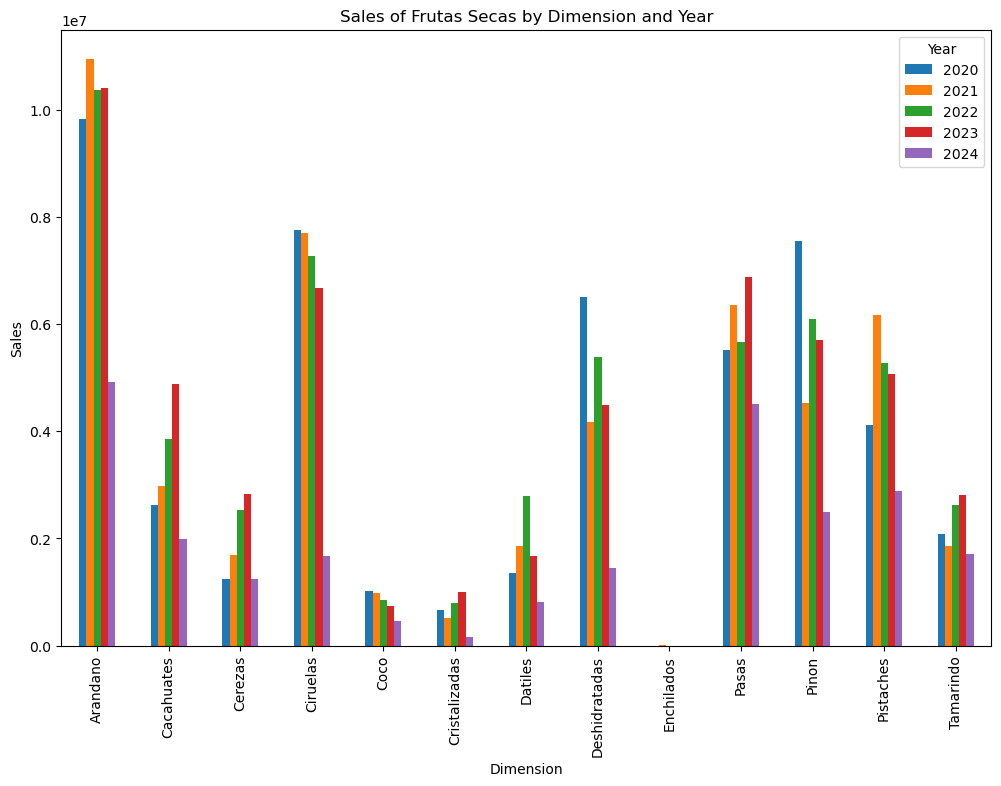

In [47]:
# Graficar la tabla pivot
pivot_table_frutas_secas.plot(kind='bar', figsize=(12, 8))
plt.title('Sales of Frutas Secas by Dimension and Year')
plt.xlabel('Dimension')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()